In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
import seaborn as sns
from scapy.all import rdpcap
from features.utils import write_to_csv, traffic_stats_summary

%matplotlib inline

### Load and Read Dataset

In [4]:
normal = "./data/dataset/normal.pcap"
ddos = "./data/dataset/ddos.pcap"

csv_normal = "./data/csv/normal.csv"
csv_ddos = "./data/csv/ddos.csv"

# Create the output directory if they don't exist
os.makedirs("./data/csv", exist_ok=True)

# Read normal traffic pcap file
packets_normal = rdpcap(normal)
df_ddos = write_to_csv(packets_normal, csv_normal)

# Read DDoS traffic pcap file
packets_ddos = rdpcap(ddos)
df_normal = write_to_csv(packets_ddos, csv_ddos)

In [5]:
df_ddos.head()

frame_number      src_addr       dst_addr  src_port  dst_port tcp_flags  \
0             0  192.168.50.6  172.217.10.98     54799       443        PA   
1             1  192.168.50.6  172.217.10.98     54799       443        PA   
2             2  192.168.50.6    172.217.7.2     54800       443        PA   
3             3  192.168.50.6    172.217.7.2     54800       443        PA   
4             4  192.168.50.6  172.217.10.98     54801       443        PA   

   protocol  
0         6  
1         6  
2         6  
3         6  
4         6

In [6]:
df_normal.head()

frame_number      src_addr      dst_addr  src_port  dst_port tcp_flags  \
0             0    172.16.0.5  192.168.50.1     52003        80         S   
1             1    172.16.0.5  192.168.50.1     52003        80         S   
2             2  192.168.50.1    172.16.0.5        80     52003        SA   
3             3  192.168.50.1    172.16.0.5        80     52003        SA   
4             4    172.16.0.5  192.168.50.1     52003        80         A   

   protocol  
0         6  
1         6  
2         6  
3         6  
4         6

In [7]:
df_normal.shape

(3104, 7)

In [8]:
df_ddos.shape

(27725, 7)

## Data Pre-processing

In [9]:
# Create the output directory if they don't exist
os.makedirs("./data/batches", exist_ok=True)

# Process normal tcp and udp .csv files
df_normal = traffic_stats_summary('./data/csv/normal.csv', 'normal')
df_normal.to_csv('./data/batches/normal.csv', index = False)

# Process ddos tcp and udp .csv files
df_ddos = traffic_stats_summary('./data/csv/ddos.csv', 'ddos')
df_ddos.to_csv('./data/batches/ddos.csv', index = False)

In [10]:
df_ddos.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
1       6.0             7.84                7.0        0.994286   
2       6.0             7.68                7.0        0.915918   
3       6.0             7.88                7.0        1.005714   
4       6.0             7.92                7.0        1.013878   
5       6.0             7.80                7.0        0.979592   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
1        0.997139                   0       0.127186               0   
2        0.957036                   0       0.124614               0   
3        1.002853                   0       0.127266               0   
4        1.006915                   0       0.127136               0   
5        0.989743                   0       0.126890               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
1            0.04             8.16  ...       0.12          109.84   
2            0.04             8.32  ...       0.12          104.86   
3            0.04             8.12  ...       0.14          108.80   
4            0.04             8.08  ...       0.12          113.40   
5            0.04             8.20  ...       0.14          103.50   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
1             135.0    1470.912653      38.352479                  0   
2              83.0    1449.959592      38.078335                  0   
3             135.0    1501.183673      38.745112                  0   
4             135.0    1285.755102      35.857427                  0   
5              83.0    1468.010204      38.314621                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
1      0.349167              0            0.1    ddos  
2      0.363135              0            0.1    ddos  
3      0.356113              0            0.1    ddos  
4      0.316203              0            0.1    ddos  
5      0.370190              0            0.1    ddos  

[5 rows x 42 columns]

In [11]:
df_normal.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
1      7.10             8.88                9.0        1.699592   
2      7.32            10.42               12.0        3.922041   
3      7.76             9.30                9.0        2.295918   
4      6.44             9.30                9.5        1.438776   
5     11.06             8.00                9.0        4.081633   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
1        1.303684                   0       0.146811               0   
2        1.980414                   0       0.190059               0   
3        1.515229                   0       0.162928               0   
4        1.199490                   0       0.128977               0   
5        2.020305                   0       0.252538               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
1            0.06             9.74  ...       0.22           99.04   
2            0.06             9.56  ...       0.14           98.20   
3            0.08             8.92  ...       0.22           86.56   
4            0.06             9.40  ...       0.16          115.68   
5            0.04             7.74  ...       0.22           62.10   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
1              83.0    2200.692245      46.911536                  0   
2             109.0    2621.714286      51.202679                  0   
3              65.0    2796.782041      52.884611                  0   
4             145.0    1888.344490      43.455086                  0   
5              65.0    4164.377551      64.531989                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
1      0.473663              0           0.14  normal  
2      0.521412              0           0.12  normal  
3      0.610959              0           0.10  normal  
4      0.375649              0           0.10  normal  
5      1.039162              0           0.08  normal  

[5 rows x 42 columns]

## Exploratory Data Analysis

In [65]:
df = pd.concat([df_normal, df_ddos], ignore_index=True)
df = df.fillna(0)
df['status'] = df['status'].map({'normal': 0, 'ddos': 1})
df.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
0      7.10             8.88                9.0        1.699592   
1      7.32            10.42               12.0        3.922041   
2      7.76             9.30                9.0        2.295918   
3      6.44             9.30                9.5        1.438776   
4     11.06             8.00                9.0        4.081633   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
0        1.303684                   0       0.146811               0   
1        1.980414                   0       0.190059               0   
2        1.515229                   0       0.162928               0   
3        1.199490                   0       0.128977               0   
4        2.020305                   0       0.252538               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
0            0.06             9.74  ...       0.22           99.04   
1            0.06             9.56  ...       0.14           98.20   
2            0.08             8.92  ...       0.22           86.56   
3            0.06             9.40  ...       0.16          115.68   
4            0.04             7.74  ...       0.22           62.10   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
0              83.0    2200.692245      46.911536                  0   
1             109.0    2621.714286      51.202679                  0   
2              65.0    2796.782041      52.884611                  0   
3             145.0    1888.344490      43.455086                  0   
4              65.0    4164.377551      64.531989                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
0      0.473663              0           0.14       0  
1      0.521412              0           0.12       0  
2      0.610959              0           0.10       0  
3      0.375649              0           0.10       0  
4      1.039162              0           0.08       0  

[5 rows x 42 columns]

In [66]:
df.describe()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
count  308.000000       308.000000         308.000000      308.000000   
mean     7.342857         9.056429           9.097403        2.237147   
std      1.622051         0.658443           0.835058        1.732326   
min      6.000000         7.000000           7.000000        0.000000   
25%      6.000000         8.700000           9.000000        0.961633   
50%      6.880000         9.190000           9.000000        1.706122   
75%      8.200000         9.520000           9.500000        3.234388   
max     15.240000        10.480000          12.000000        8.344490   

       ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
count      308.000000               308.0     308.000000           308.0   
mean         1.381921                 0.0       0.154890             0.0   
std          0.573155                 0.0       0.070218             0.0   
min          0.000000                 0.0       0.000000             0.0   
25%          0.980629                 0.0       0.107088             0.0   
50%          1.306184                 0.0       0.140991             0.0   
75%          1.798440                 0.0       0.197275             0.0   
max          2.888683                 0.0       0.376131             0.0   

       ip.src.len.rte  ip.dst.len.mean  ...   dport.rte  tcp.flags.mean  \
count      308.000000       308.000000  ...  308.000000      308.000000   
mean         0.070325         9.043377  ...    0.212013       89.905974   
std          0.019536         0.582755  ...    0.082895       19.683215   
min          0.020000         6.800000  ...    0.040000       13.200000   
25%          0.060000         8.770000  ...    0.160000       76.635000   
50%          0.080000         9.140000  ...    0.200000       92.730000   
75%          0.080000         9.460000  ...    0.260000      105.445000   
max          0.120000        10.220000  ...    0.480000      129.740000   

       tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
count        308.000000     308.000000     308.000000              308.0   
mean          90.957792    2118.895794      44.524294                0.0   
std           37.630120     936.606354      11.701606                0.0   
min            0.000000       0.000000       0.000000                0.0   
25%           65.000000    1450.702857      38.088093                0.0   
50%           65.000000    1980.727551      44.505365                0.0   
75%          135.000000    2883.855204      53.701538                0.0   
max          145.000000    4906.604490      70.047159                0.0   

       tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte      status  
count    308.000000          308.0     308.000000  308.000000  
mean       0.534178            0.0       0.086623    0.100649  
std        0.264968            0.0       0.025529    0.301353  
min        0.000000            0.0       0.020000    0.000000  
25%        0.376745            0.0       0.060000    0.000000  
50%        0.467495            0.0       0.100000    0.000000  
75%        0.631417            0.0       0.100000    0.000000  
max        2.493597            0.0       0.160000    1.000000  

[8 rows x 42 columns]

## Bivariate Data Analysis

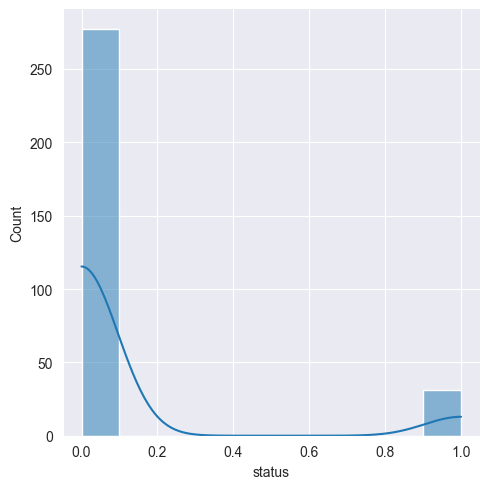

In [67]:
# plot the distribution of the status
sns.displot(df['status'],kde=True)

## Multivariate Data Analysis

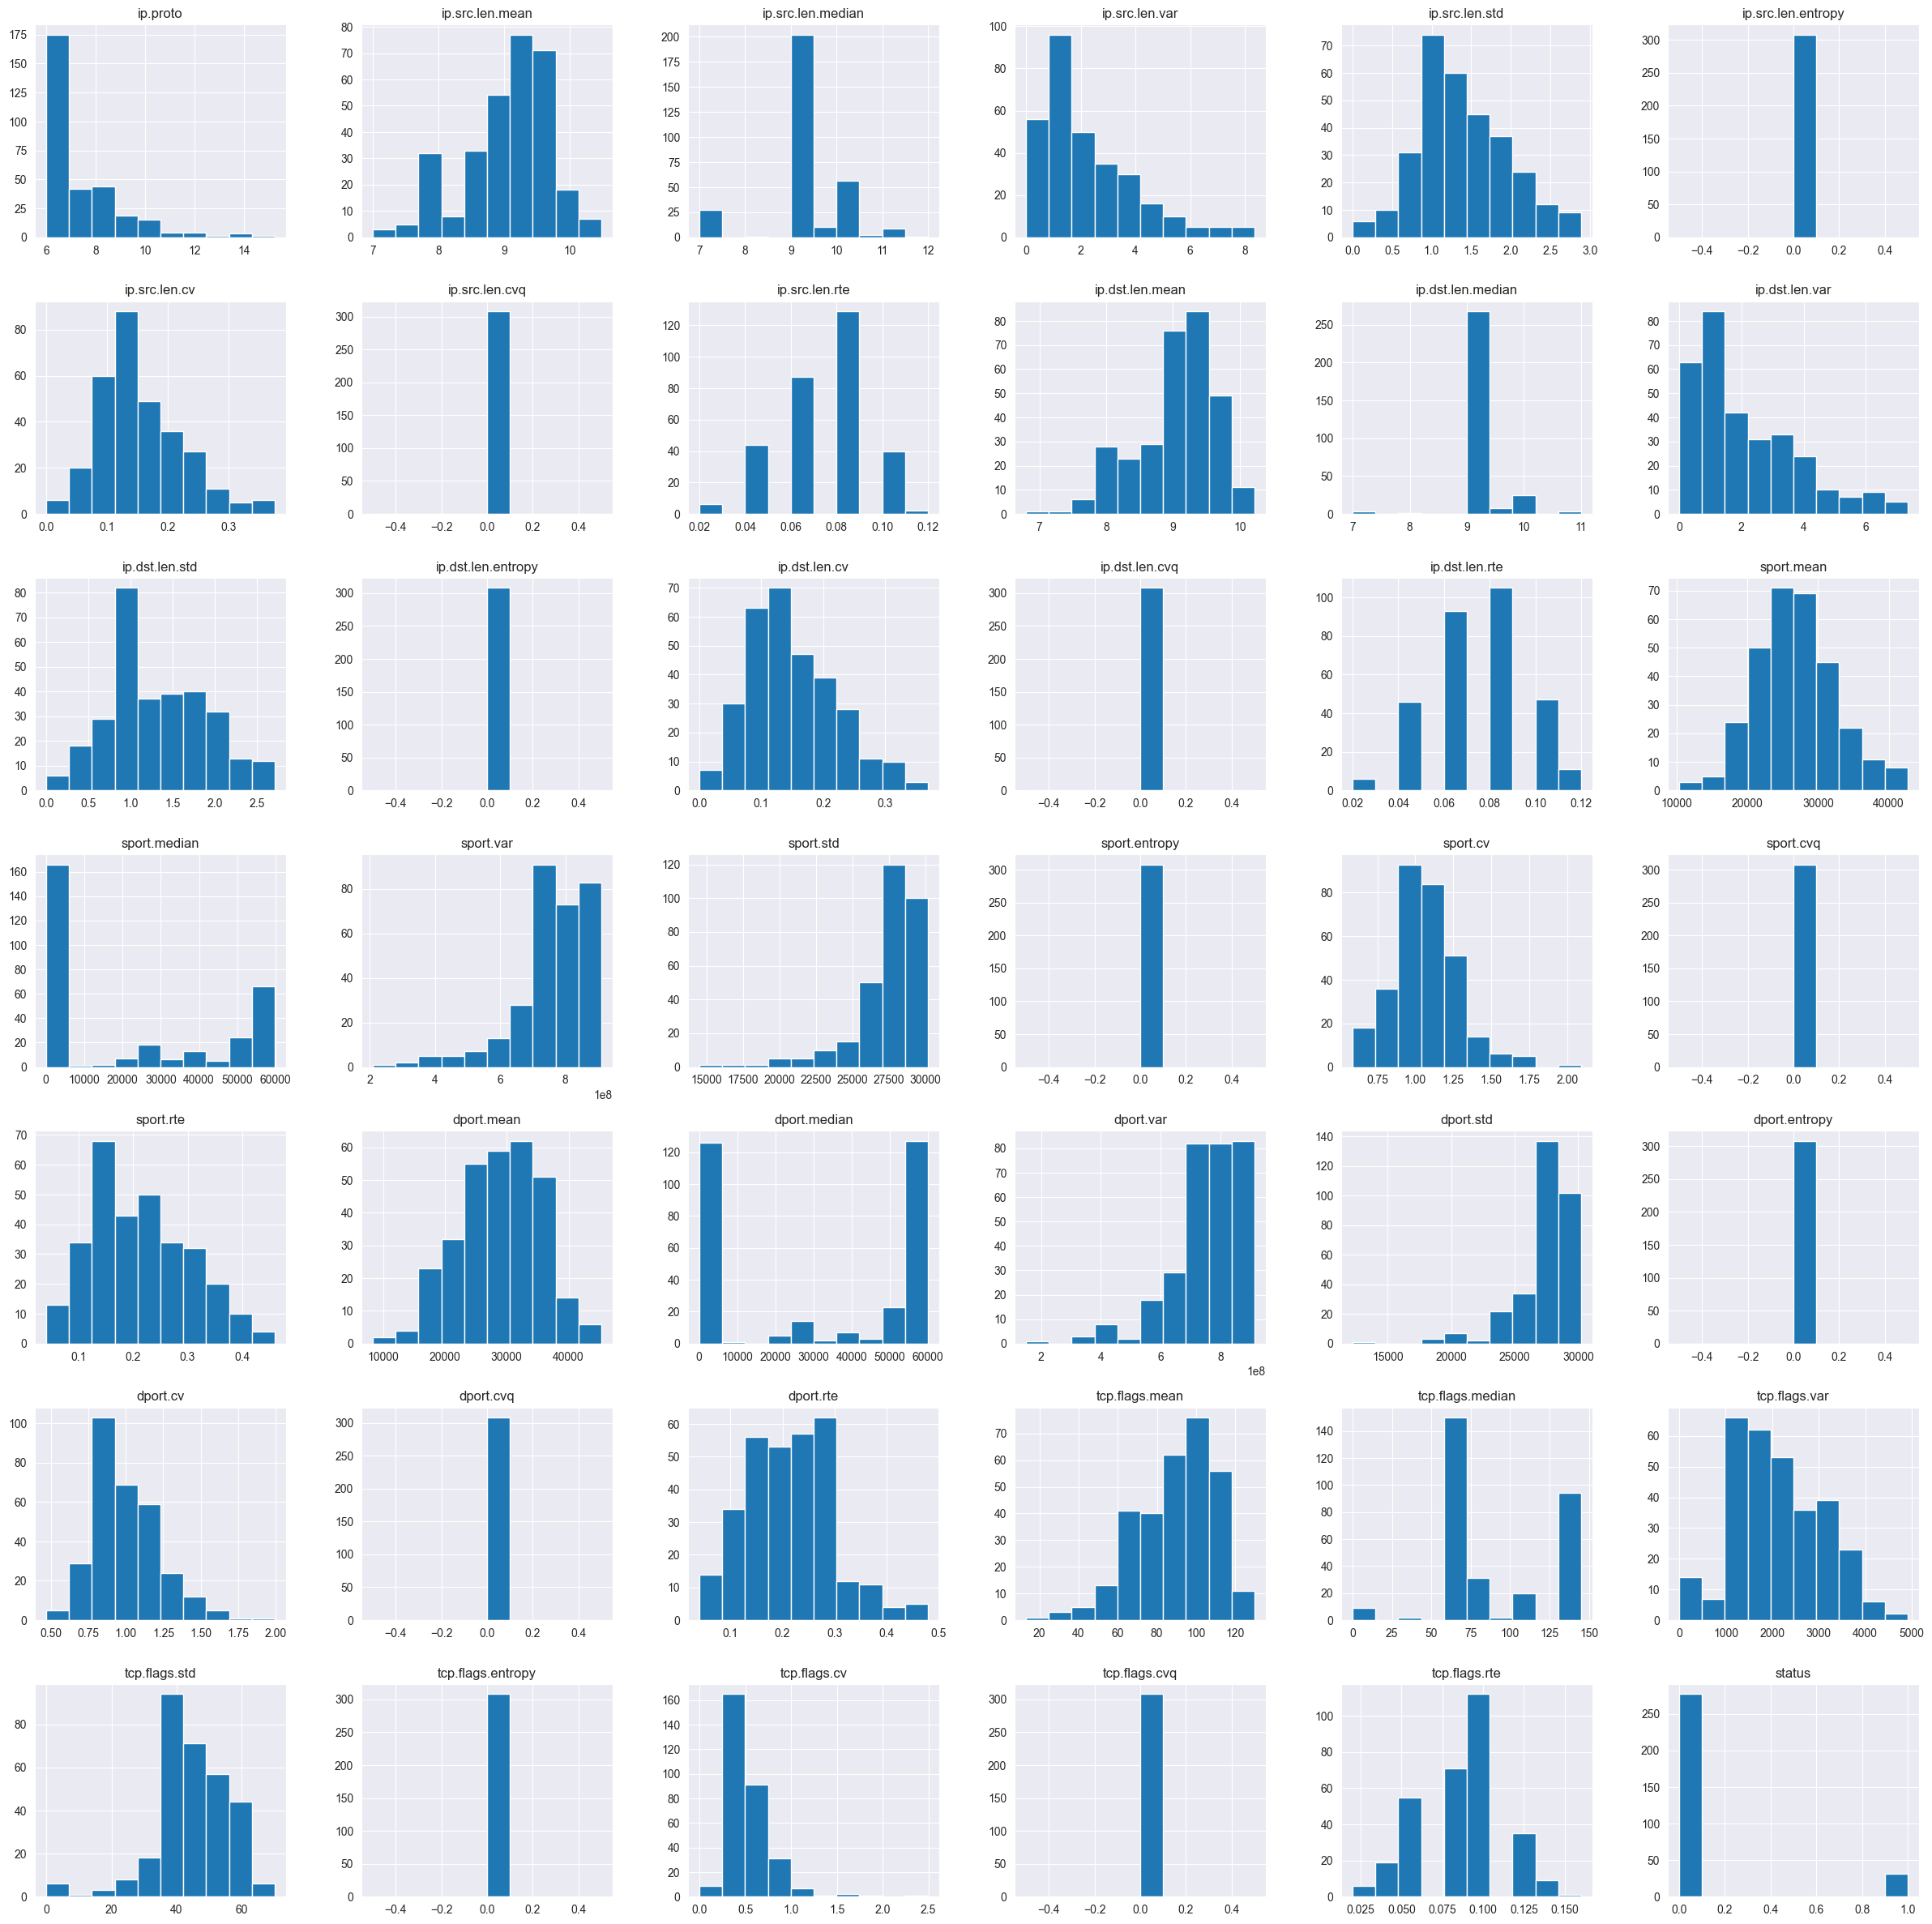

In [68]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


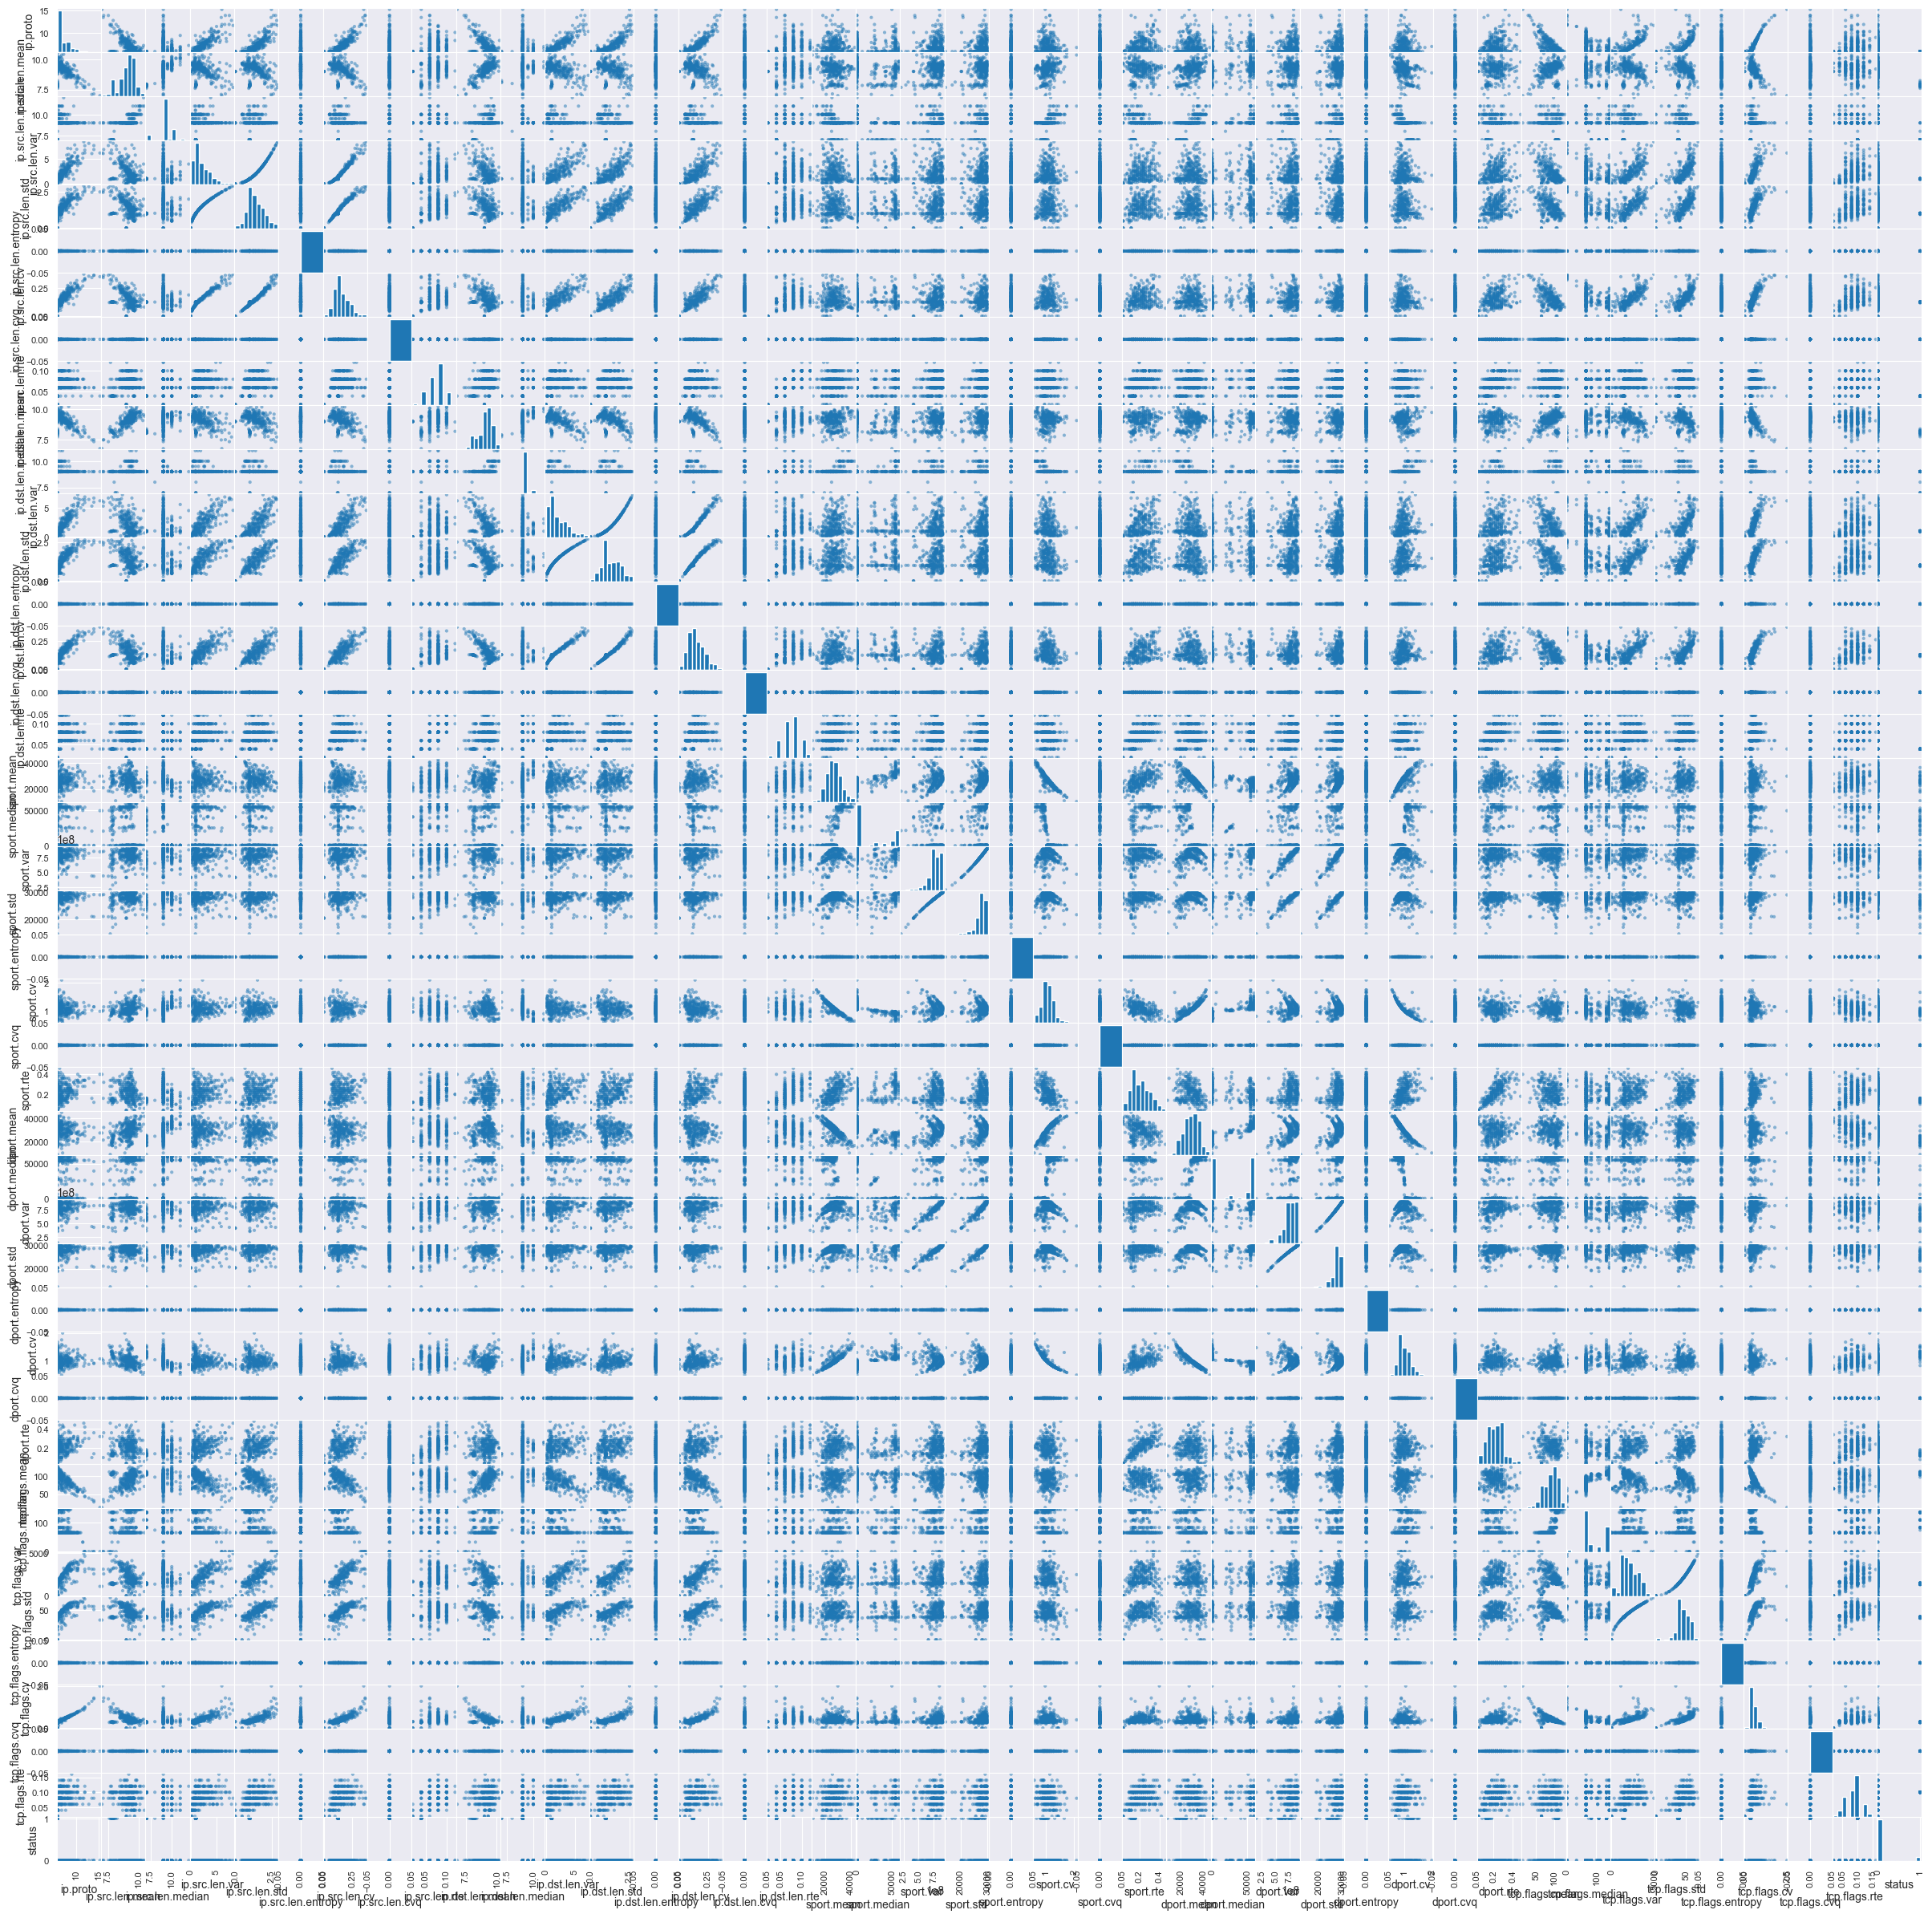

In [69]:
# Create scatter plot matrix to visualize the relationship between pairs of variables
scatter_matrix(df, figsize = (30,30))
plt.show()

<Axes: >

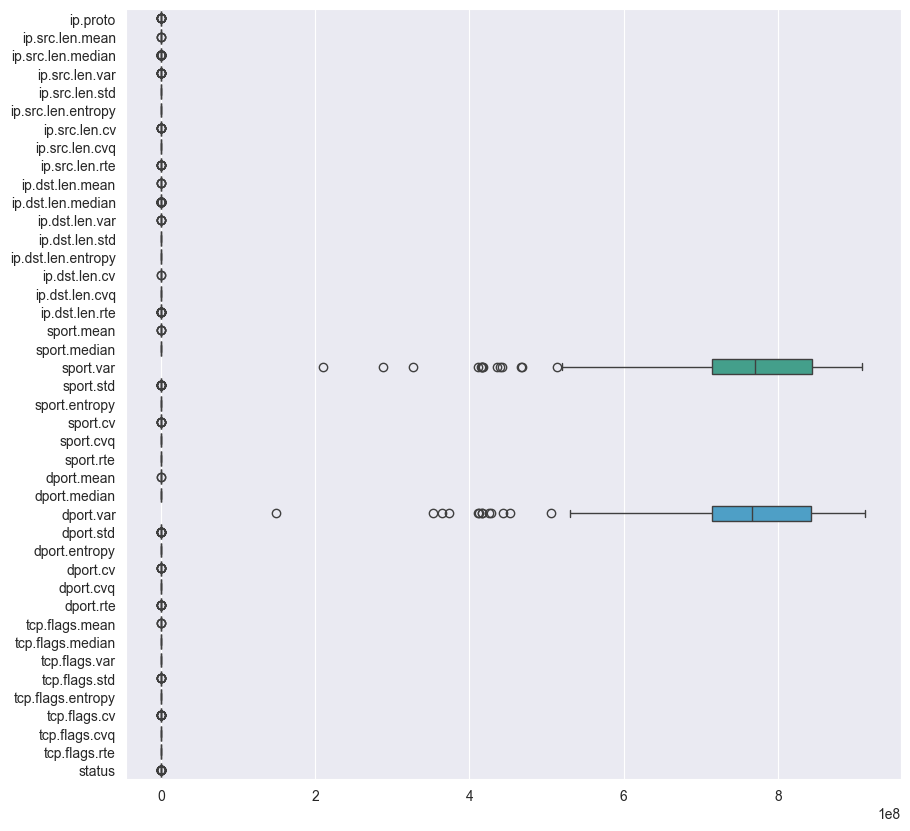

In [70]:
# Boxplots are useful for visually summarizing the distribution of a dataset, identifying outliers
# and comparing the distribution of multiple datasets. They provide a compact way
# to display key statistical information about the data.
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature Selection

In [71]:
df.corr()

ip.proto  ip.src.len.mean  ip.src.len.median  \
ip.proto            1.000000        -0.451861           0.036179   
ip.src.len.mean    -0.451861         1.000000           0.728714   
ip.src.len.median   0.036179         0.728714           1.000000   
ip.src.len.var      0.860962        -0.339364           0.052052   
ip.src.len.std      0.819102        -0.296771           0.058689   
ip.src.len.entropy       NaN              NaN                NaN   
ip.src.len.cv       0.871905        -0.451994          -0.045080   
ip.src.len.cvq           NaN              NaN                NaN   
ip.src.len.rte      0.119621         0.344327           0.305545   
ip.dst.len.mean    -0.519814         0.827868           0.504153   
ip.dst.len.median  -0.071999         0.212371          -0.011928   
ip.dst.len.var      0.888482        -0.322632           0.001039   
ip.dst.len.std      0.835073        -0.293358          -0.018567   
ip.dst.len.entropy       NaN              NaN                NaN   
ip.dst.len.cv       0.876566        -0.395255          -0.070550   
ip.dst.len.cvq           NaN              NaN                NaN   
ip.dst.len.rte      0.205759         0.240713           0.240300   
sport.mean          0.053648        -0.150197          -0.326866   
sport.median        0.021773        -0.257632          -0.394444   
sport.var           0.128940         0.228009           0.201729   
sport.std           0.121353         0.238572           0.210686   
sport.entropy            NaN              NaN                NaN   
sport.cv           -0.051445         0.324233           0.507175   
sport.cvq                NaN              NaN                NaN   
sport.rte           0.330161        -0.057588          -0.048831   
dport.mean          0.000951         0.469506           0.627077   
dport.median       -0.015803         0.422535           0.563002   
dport.var           0.123196         0.240175           0.231019   
dport.std           0.115983         0.248699           0.237094   
dport.entropy            NaN              NaN                NaN   
dport.cv           -0.025232        -0.396560          -0.570893   
dport.cvq                NaN              NaN                NaN   
dport.rte           0.292784         0.021700           0.056449   
tcp.flags.mean     -0.739553         0.306438          -0.127833   
tcp.flags.median   -0.549636         0.231699          -0.098138   
tcp.flags.var       0.700724        -0.224490           0.013440   
tcp.flags.std       0.616603        -0.199115          -0.008471   
tcp.flags.entropy        NaN              NaN                NaN   
tcp.flags.cv        0.952973        -0.453082           0.018171   
tcp.flags.cvq            NaN              NaN                NaN   
tcp.flags.rte       0.155887        -0.169422          -0.216767   
status             -0.277404        -0.599337          -0.751004   

                    ip.src.len.var  ip.src.len.std  ip.src.len.entropy  \
ip.proto                  0.860962        0.819102                 NaN   
ip.src.len.mean          -0.339364       -0.296771                 NaN   
ip.src.len.median         0.052052        0.058689                 NaN   
ip.src.len.var            1.000000        0.968421                 NaN   
ip.src.len.std            0.968421        1.000000                 NaN   
ip.src.len.entropy             NaN             NaN                 NaN   
ip.src.len.cv             0.969355        0.981903                 NaN   
ip.src.len.cvq                 NaN             NaN                 NaN   
ip.src.len.rte            0.238922        0.342545                 NaN   
ip.dst.len.mean          -0.336739       -0.300924                 NaN   
ip.dst.len.median        -0.090372       -0.081359                 NaN   
ip.dst.len.var            0.805170        0.795512                 NaN   
ip.dst.len.std            0.783835        0.817787                 NaN   
ip.dst.len.entropy             NaN             NaN         

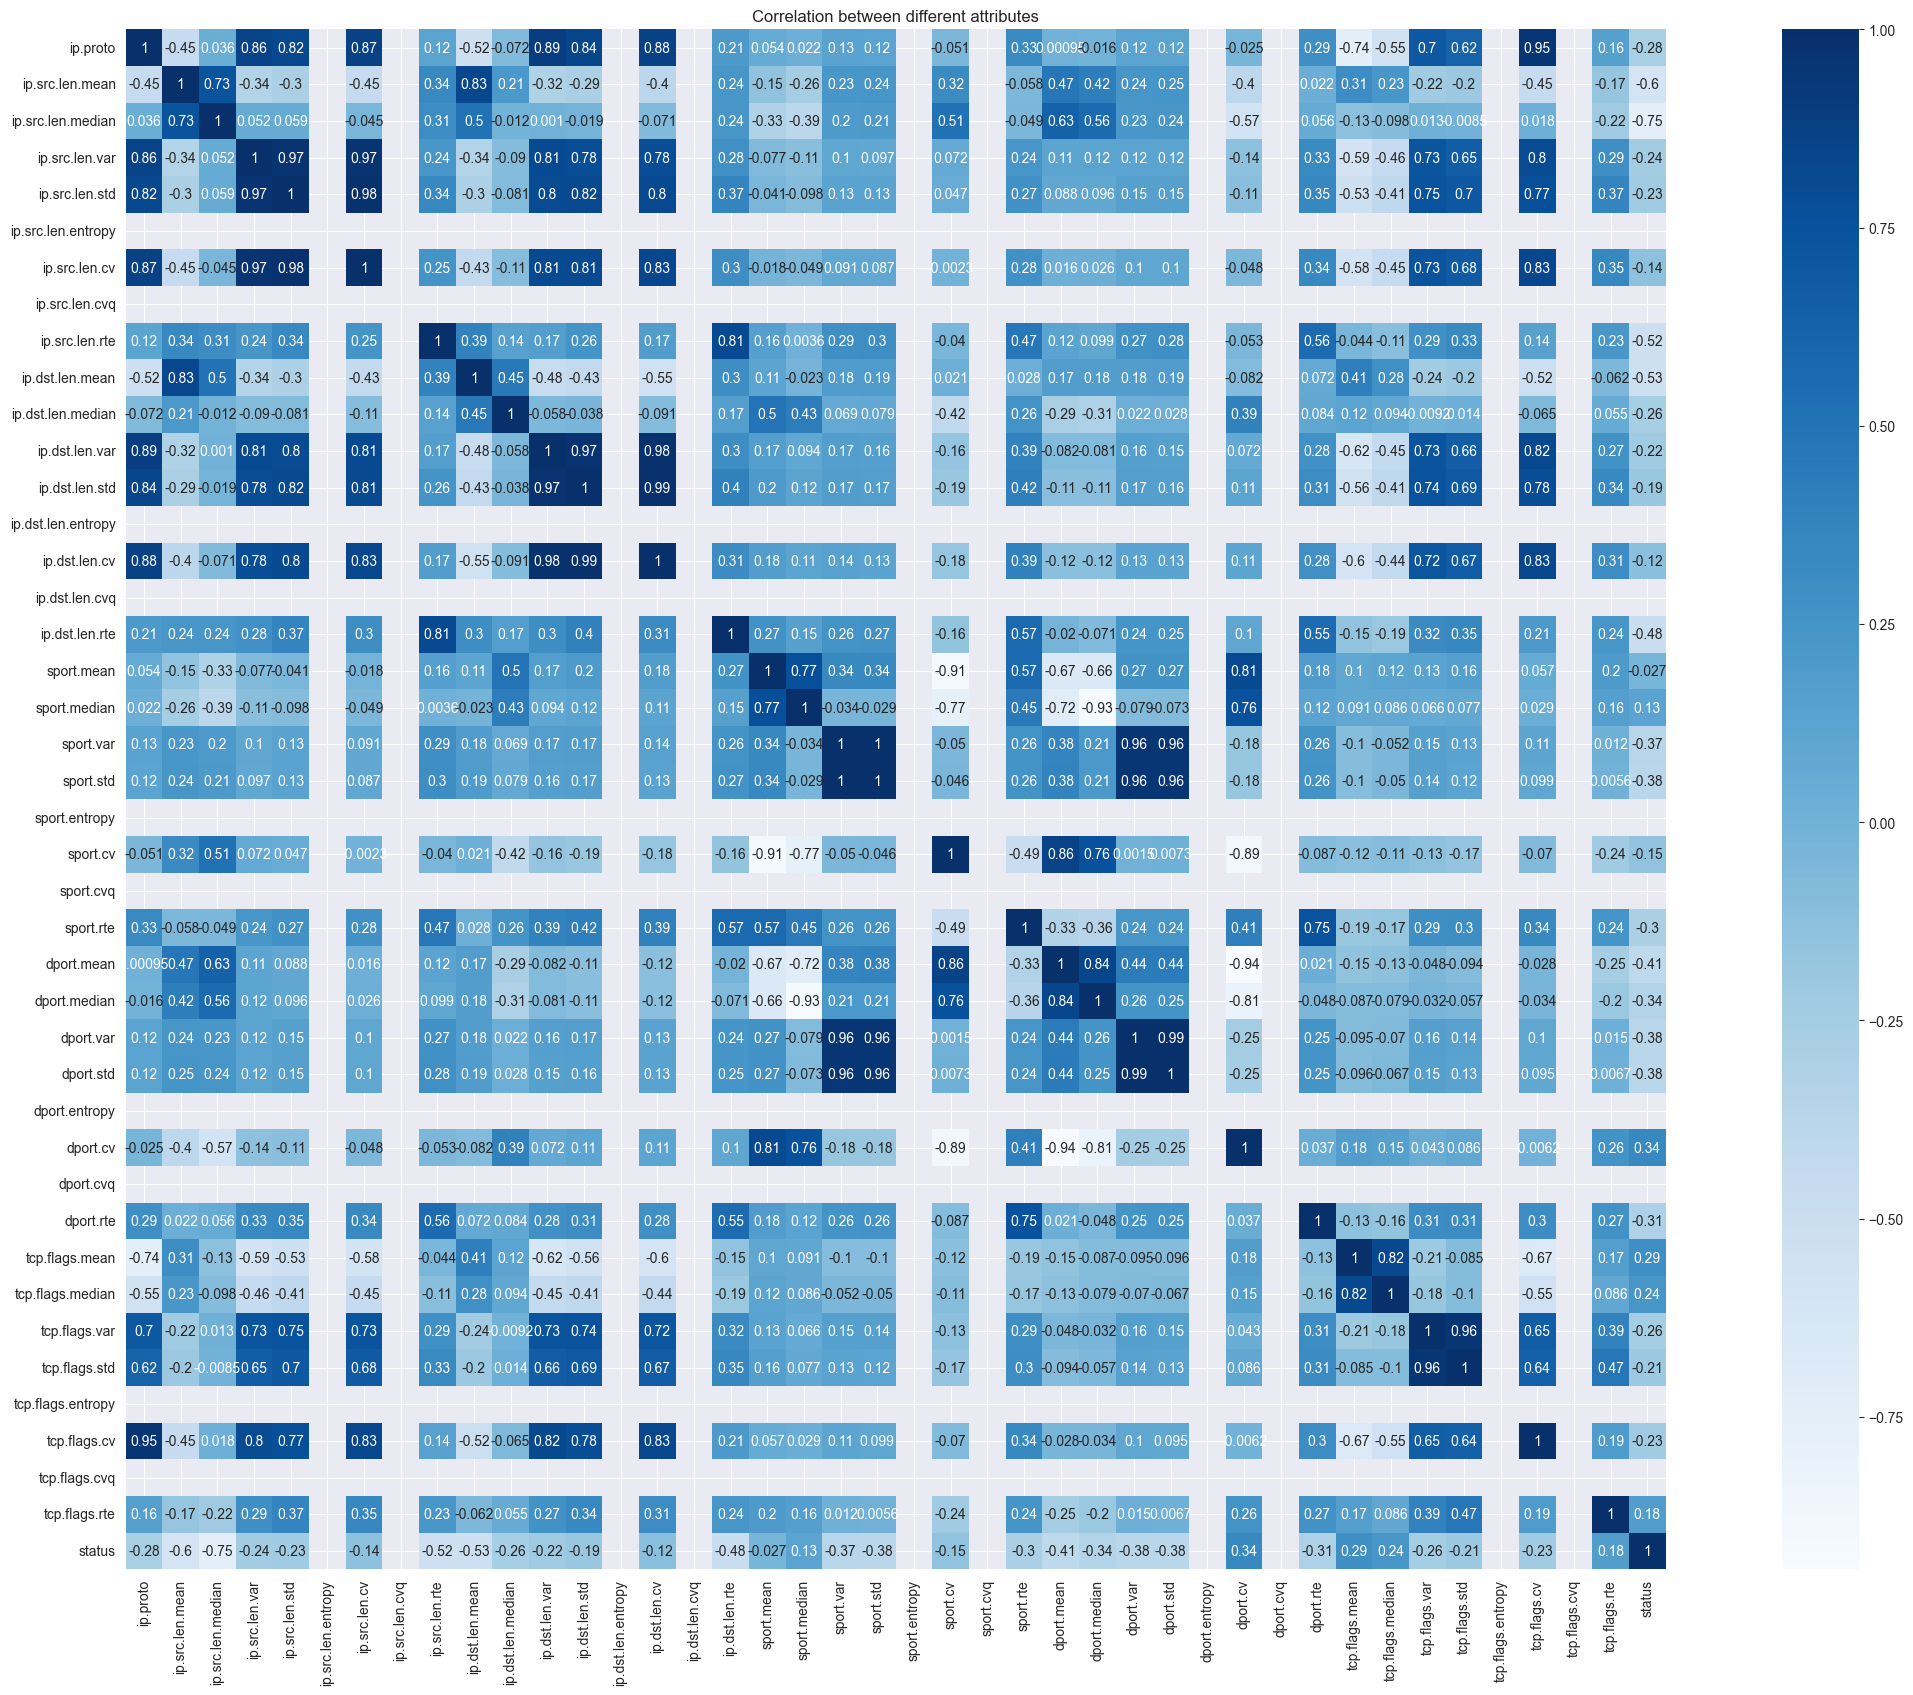

In [72]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [87]:
# Correlation with output variable
cor_target = abs(cor["status"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

ip.proto             0.277404
ip.src.len.mean      0.599337
ip.src.len.median    0.751004
ip.src.len.var       0.241137
ip.src.len.std       0.226151
ip.src.len.cv        0.136385
ip.src.len.rte       0.520126
ip.dst.len.mean      0.530192
ip.dst.len.median    0.264413
ip.dst.len.var       0.219996
ip.dst.len.std       0.189180
ip.dst.len.cv        0.122703
ip.dst.len.rte       0.481771
sport.mean           0.027380
sport.median         0.125169
sport.var            0.370878
sport.std            0.376404
sport.cv             0.151604
sport.rte            0.295256
dport.mean           0.410343
dport.median         0.339037
dport.var            0.377925
dport.std            0.380037
dport.cv             0.338223
dport.rte            0.306741
tcp.flags.mean       0.291748
tcp.flags.median     0.240224
tcp.flags.var        0.258981
tcp.flags.std        0.205659
tcp.flags.cv         0.233944
tcp.flags.rte        0.175571
status               1.000000
Name: status, dtype: float64

## Train and Test Model

In [74]:
# Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['status'].values
X = df.drop('status', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [75]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

## Random Forest Classifier

Now we can move on to a more powerful model, the random forest. This takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

In [76]:
model = RandomForestClassifier(n_estimators=100, random_state=50, max_features = 'sqrt', n_jobs=-1, verbose = 1)
model.fit(X_train, Y_train)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


Average number of nodes 8
Average maximum depth 3


#### Confusion Matrix

In [77]:
# Make probability predictions
train_probs = model.predict_proba(X_train)[:, 1]
probs = model.predict_proba(X_test)[:, 1]

train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[81  0]
 [ 0 12]]


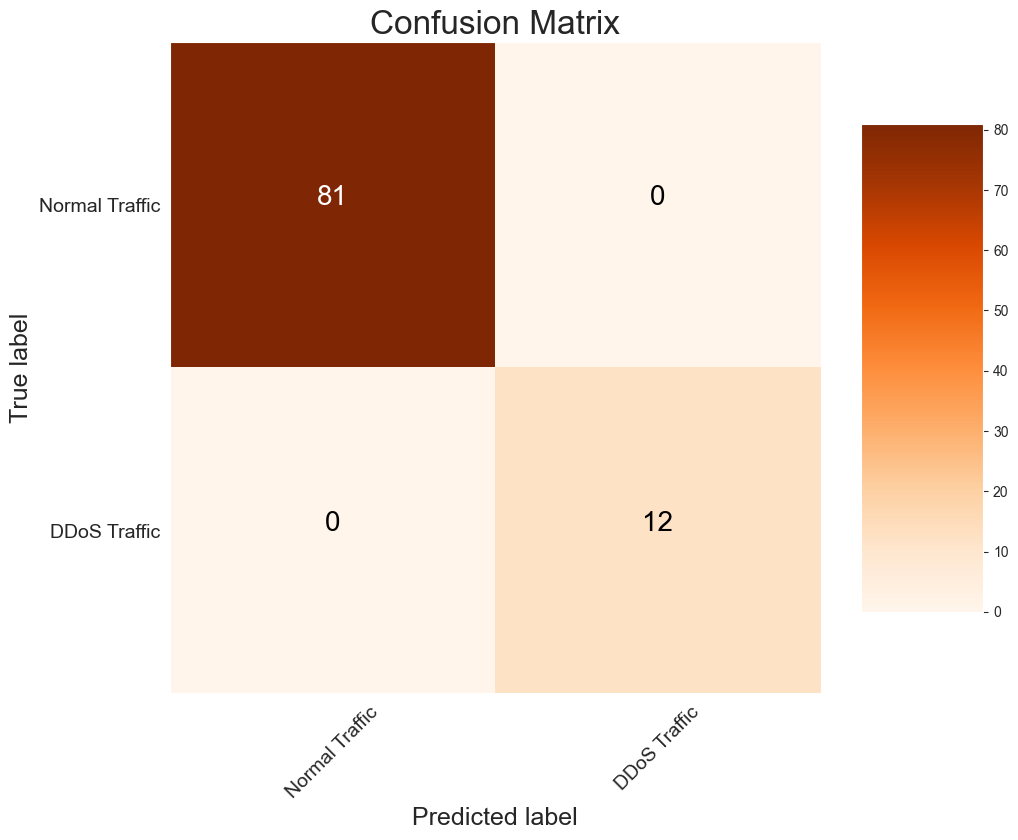

In [78]:
cm = confusion_matrix(Y_test, predictions)
plot_confusion_matrix(cm, classes = ['Normal Traffic', 'DDoS Traffic'], title = 'Confusion Matrix')

#### Feature Importance

In [79]:
importances = pd.DataFrame({
  	'feature': list(df.drop('status', axis=1).columns),
  	'importance': model.feature_importances_
}).sort_values('importance', ascending = False)
importances.head()

feature  importance
2   ip.src.len.median    0.154816
1     ip.src.len.mean    0.145508
9     ip.dst.len.mean    0.108732
8      ip.src.len.rte    0.078846
26       dport.median    0.073485

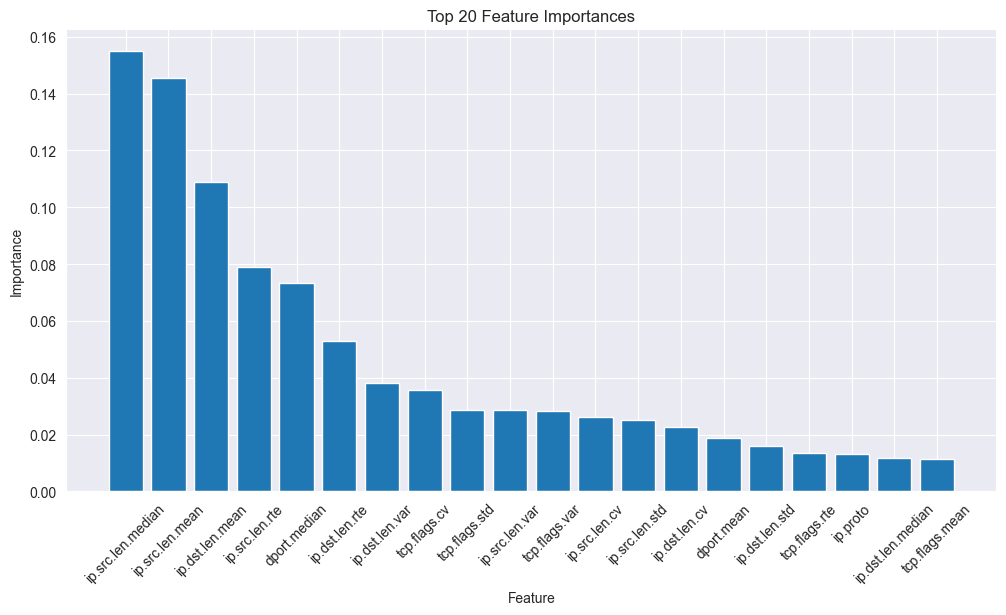

In [82]:
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'][:20], importances['importance'][:20])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances')
plt.xticks(rotation=45)
plt.show()

#### Visualize The Forest

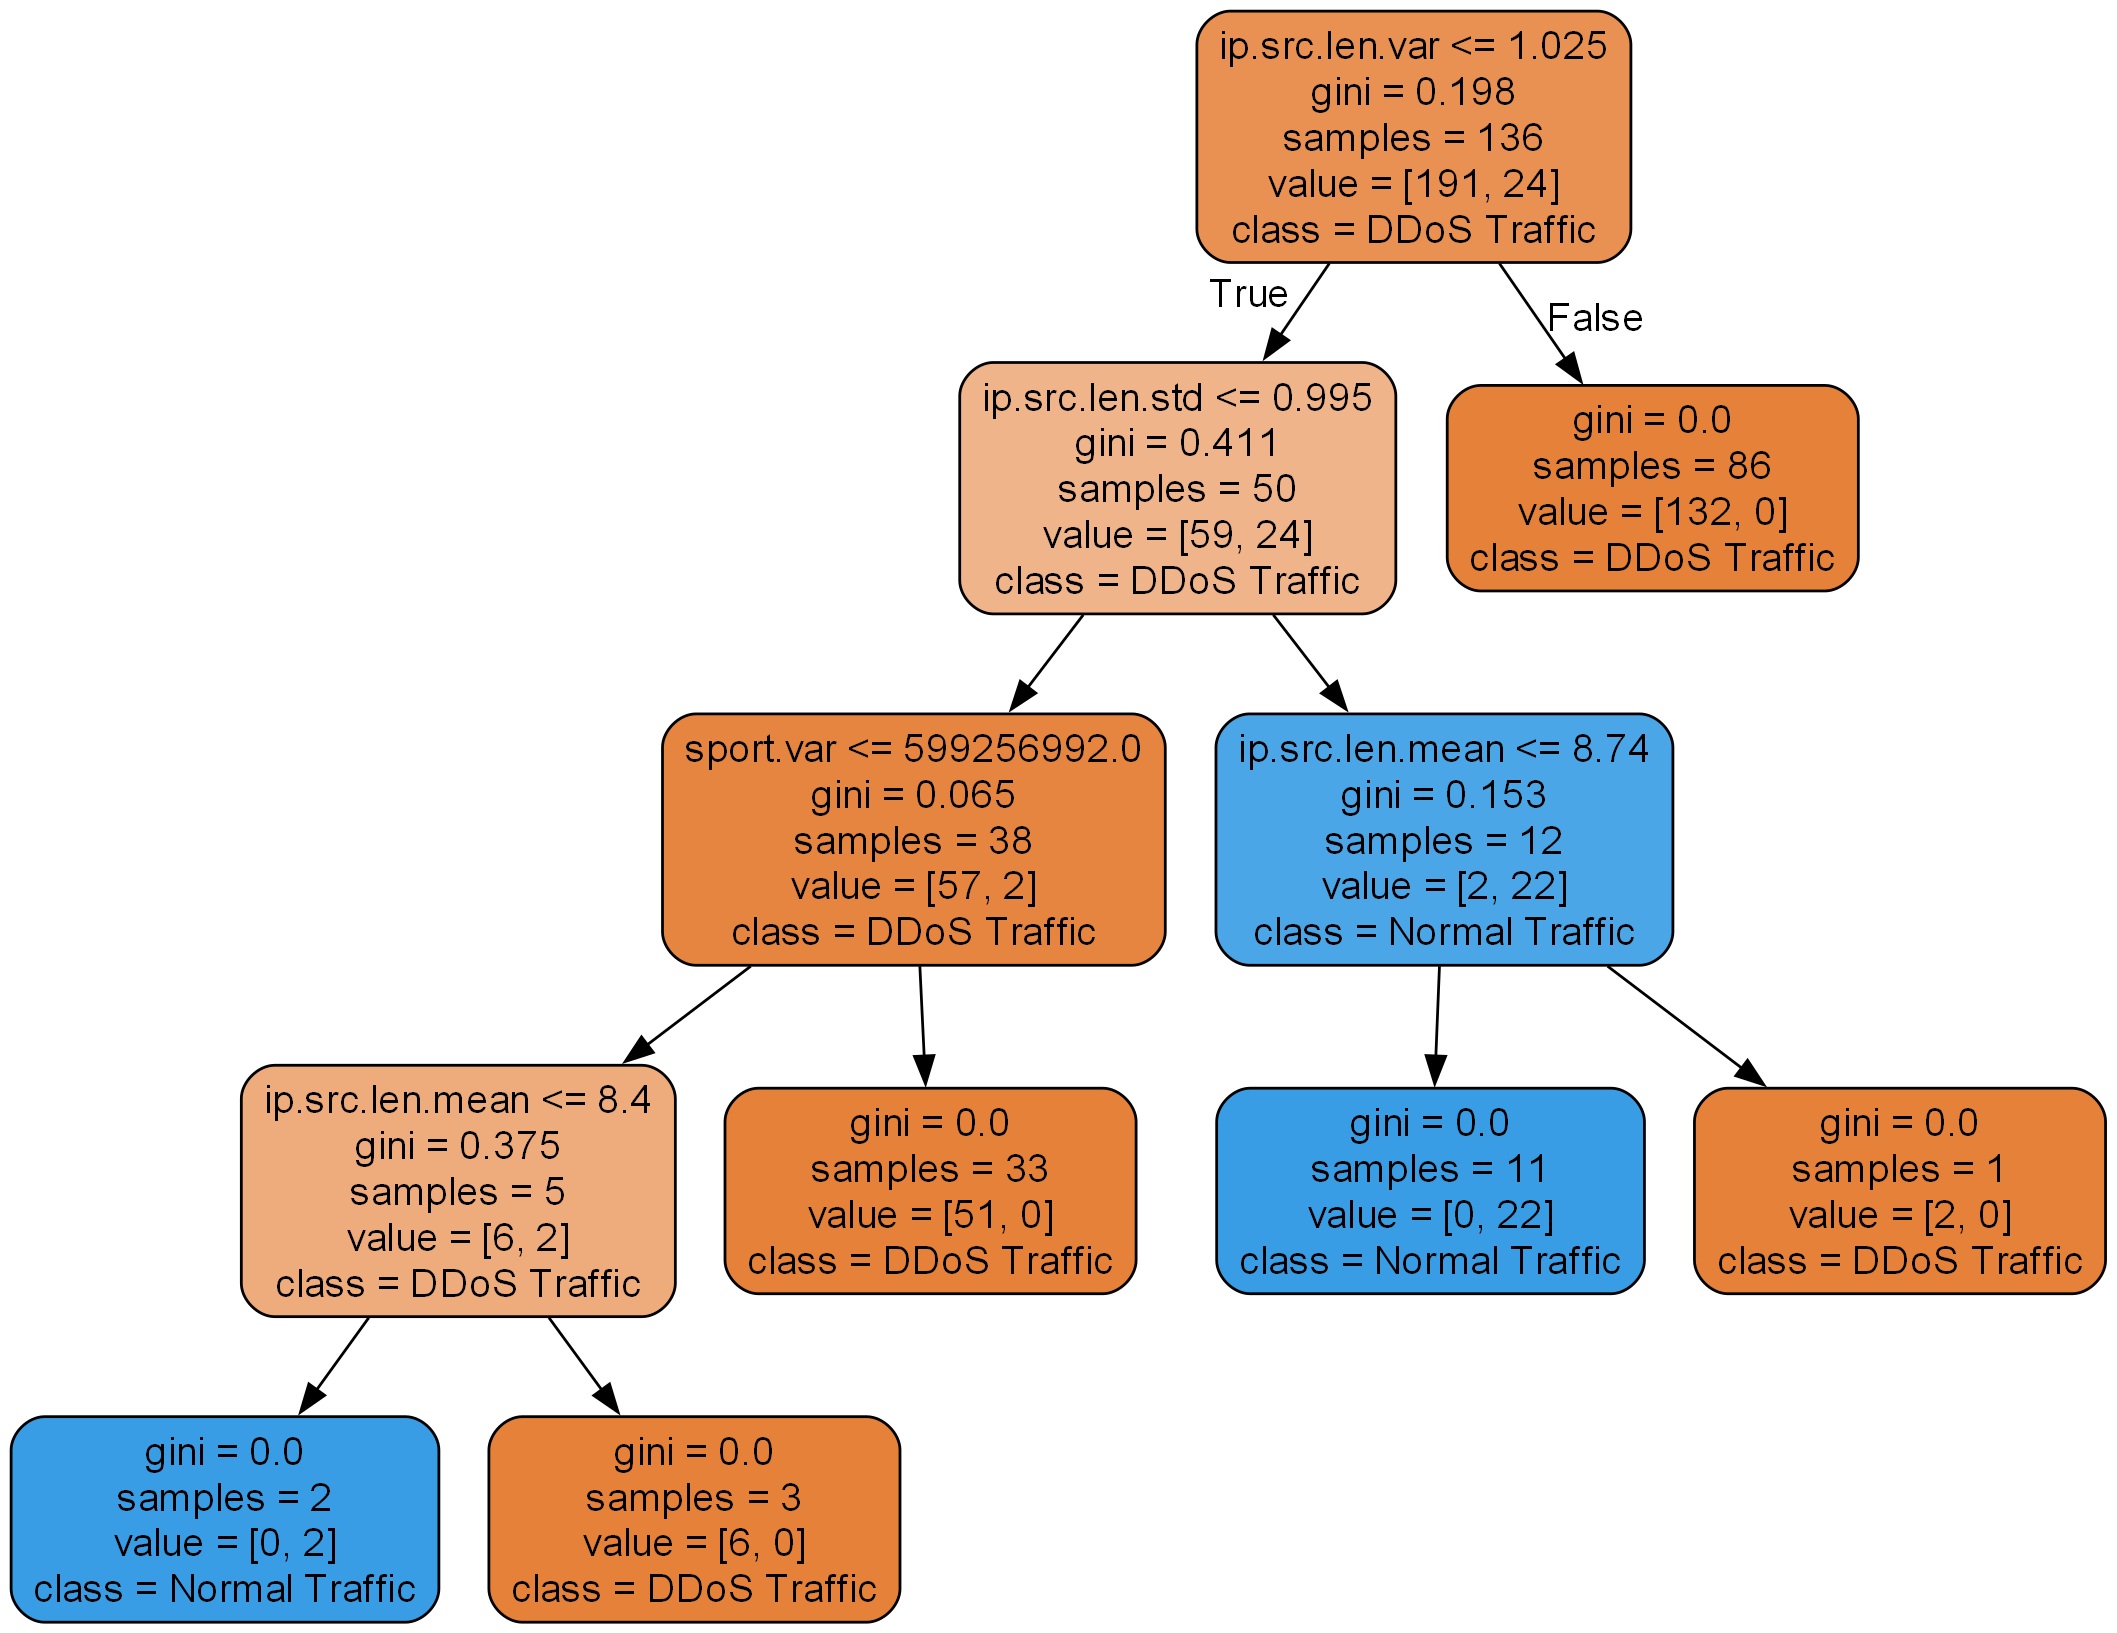

In [83]:
estimator = model.estimators_[1]
export_graphviz(estimator, 'forest.dot', rounded = True, feature_names=list(df.columns[:-1]), max_depth = 8, class_names = ['DDoS Traffic', 'Normal Traffic'], filled = True)

call(['dot', '-Tpng', 'forest.dot', '-o', 'forest.png', '-Gdpi=200'])
Image('forest.png')

In [84]:
print(f'Model Accuracy: {estimator.score(X_test, Y_test)}')

Model Accuracy: 0.967741935483871


In [85]:
# Dump the trained model to a file
from joblib import dump
dump(model, 'model.sav')

['model.sav']